In [1]:
import pandas as pd
import numpy as np

# Getting the Input and Preprocessing

In [2]:
import spacy
import os

nlp = spacy.load('en_core_web_lg')


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

def clean(val):
    '''
    Clean the row description
    '''
    doc = nlp(val)
    text = ''
    for w in doc:
        if not w.is_stop and not w.is_punct and not w.like_num: 
            text += w.lemma_.lower() + ' '
    text = text.strip()
    return text

def clean_prompt(prompt):
    '''
    Clean the Prompt

    Change: Concatenated TfIdf
    - Cut into a threshold number
    - Less than 10 words etc.
    '''
    doc = nlp(prompt)
    txt = ''
    for w in doc:
        if not w.is_stop and not w.is_punct and not w.like_num:
            txt += w.lemma_.lower() + ' '
    txt = txt.strip()

    vect = TfidfVectorizer()
    X = vect.fit_transform([txt])
    df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out()).T.sort_values(by=0).iloc[:min(10, X.shape[1])]
    
    new_txt = ''
    for val in df.index:
        new_txt += val + ' '

    return new_txt

In [14]:
sample_text = 'I would personally want to go somewhere where I can be safe and relax. I want to just get out and explore nature. Anywhere where I can also bike would be amazing. My father once took me to a biking trip at a mountain. I want to see some monkeys! It would be nice to be one with nature again. I miss nature'

clean_text = clean_prompt(sample_text)

vect = TfidfVectorizer()
X = vect.fit_transform([clean_text])

df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out()).T.sort_values(by=0, ascending=False).iloc[:min(10, X.shape[1])]

new_txt = ''
for val in df.index:
    new_txt += val + ' '

print(new_txt)

nature want amazing bike biking explore father miss monkey mountain 


In [1]:
prompt = input()
cleaned_prompt = clean_prompt(prompt)

n = int(input())

df = pd.read_csv(os.getcwd() + '\\..\\data\\data_clean.csv')
df['Description'] = df['Description'].apply(clean)
doc = nlp(cleaned_prompt)

df['Similarity'] = df['Description'].apply(lambda x: doc.similarity(nlp(x)))

print(prompt)
print(cleaned_prompt)

top_5 = df.sort_values(by='Similarity', ascending=False)[['Location', 'Description', 'Similarity']].reset_index(drop=True).head(n)
top_5

NameError: name 'clean_prompt' is not defined

# Creating a Network Similarity

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

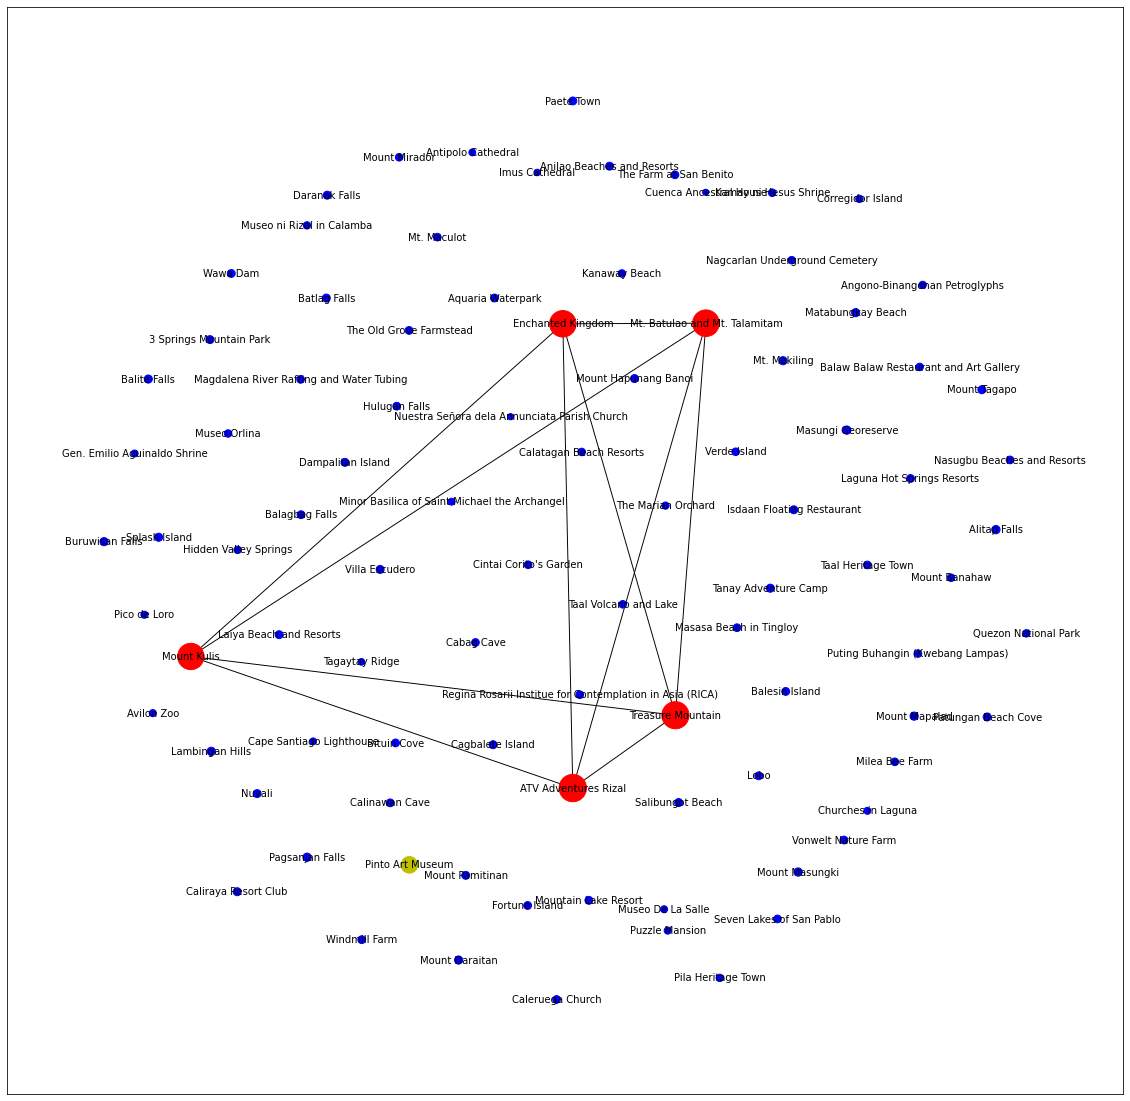

In [94]:
place_list = list(df['Location'])

top_n = list(top_5['Location'])

G = nx.Graph()

similarity = list(df['Similarity'])

for place in place_list:
    G.add_node(place)


for place1 in place_list:
    for place2 in place_list:
        if place1 == place2:
            continue
        else:
            G.add_edge(place1, place2)

colors = []
for i in range(len(similarity)):
    if place_list[i] in top_n:
        colors.append('r')
        similarity[i] *= 1000
    elif similarity[i] >= max(similarity) / 2:
        colors.append('y')
        similarity[i] *= 500
    else:
        colors.append('b')
        similarity[i] *= 100

edge_width = []
for i in range(len(place_list)):
    for j in range(i+1, len(place_list)):
        if place_list[i] in top_n and place_list[j] in top_n:
            edge_width.append(0.95)
        elif similarity[i] >= max(similarity)/2 and similarity[j] >= max(similarity)/2:
            edge_width.append(0.5)
        else:
            edge_width.append(0)

pos = nx.spring_layout(G)

plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, width=edge_width, node_size=similarity, node_color=colors, font_size=10, font_color='black')

# Create Tour Iternerary

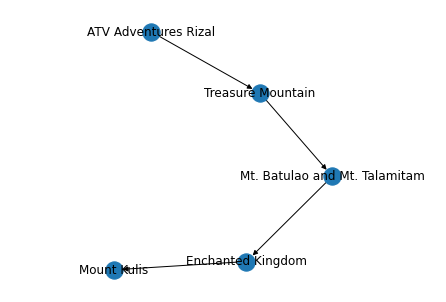

In [93]:
df_recom_places = top_5

edges=[]
for i in range((df_recom_places.shape[0])-1):
    edges.append(((df_recom_places["Location"][i], df_recom_places["Location"][i+1])))
edges

G = nx.DiGraph(edges)

nx.draw(G, with_labels=True)
plt.margins(x=0.4)